In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('temp2_UWRL_river_velocimetry_dataset.csv')
# df['v_pos'] = [0 if value < 0 else 1 for value in df.v_x.values] 
# df.pH = [value if value < 15 else value / 10 for value in df.pH.values]
df.datetime = pd.to_datetime(df.datetime)
print(df.columns)
# df

Index(['datetime', 'y', 'x', 'v_x', 'v_y', 'v_len', 's2n', 'corr',
       'sun_altitude', 'sun_azimuth', 'spacial_location', 'LRO_discharge',
       'LRO_discharge_site', 'turbidity', 'vegetation', 'visibility',
       'cloudcover', 'solarradiation', 'uvindex', 'conditions', 'v_pos',
       'angle', 'angle_var', 'angle_var_support'],
      dtype='object')


1.6117588931594693


<Axes: xlabel='v_len', ylabel='Count'>

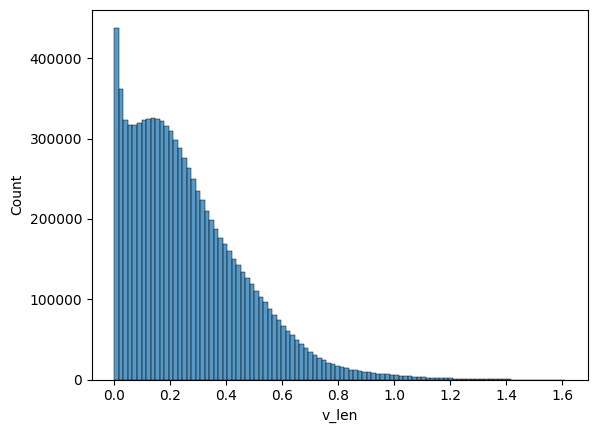

In [3]:
print(sorted(df.v_len.unique())[-1])

sns.histplot(
    data=df,
    x='v_len',
    bins=100
)

### Does the time of day effect the number of vectors present?

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

sns.scatterplot(
    data=df[df.v_x >= 0],
    x='sun_altitude',
    y='v_x',
    ax=axes[0]
)

sns.scatterplot(
    data=df,
    x='sun_altitude',
    y='v_x',
    ax=axes[1]
)

sns.scatterplot(
    data=df[df.v_x < 0],
    x='sun_altitude',
    y='v_x',
    ax=axes[2]
)

In [ ]:
sns.scatterplot(
    data=df,
    x='sun_altitude',
    y='v_len'
)

In [ ]:
df[df.sun_altitude < 0]
df.columns

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

var = 'visibility'

sns.histplot(
    data=df,
    x=var,
    ax=axes[0]
)

sns.histplot(
    data=df[df.sun_altitude < 0],
    x=var,
    ax=axes[1]
)

In [ ]:
sns.histplot(
    # data=df[df.sun_altitude < 0],
    data=df,
    x='uvindex',
    discrete=True,
    shrink=0.8
)

In [ ]:
sns.histplot(
    data=df,
    x='sun_altitude',
    y='v_x',
    binwidth=[0.05, 0.1]
)

In [ ]:
df2 = df.copy()
df2['sun_alt_rounded'] = 0.2 * round(df.sun_altitude / 0.2)

sns.histplot(
    data=df2,
    x='v_x',
    hue='sun_alt_rounded',
    binwidth=0.1
)

In [ ]:
sns.histplot(
    data=df[df.cloudcover == 0],
    x='sun_altitude',
    hue='v_pos',
    bins=5
)

In [ ]:
sns.scatterplot(
    # data=df[(df.cloudcover == 0)&(df.v_x >= 0)&(df.v_len >= 0.15)],
    data=df[(df.cloudcover == 0)&(df.v_len >= 0.15)],
    x='sun_altitude',
    y='v_x',
)

### Does the cloudcover effect the number of vectors present?

In [ ]:
sns.histplot(
    data=df,
    x='cloudcover',
    y='v_x'
)

In [ ]:
sns.histplot(
    data=df[df.v_x >= 0],
    x='cloudcover',
    y='v_len'
)

In [ ]:
df[df.cloudcover == 0]

Does wind speed correlate with the length of vectors?

In [ ]:
sns.histplot(
    data=df[df.v_len >= 0.15],
    x='v_len',
    bins=12
)

In [ ]:
df[df.v_len < 0.01]

In [ ]:
sns.scatterplot(
    data=df[(df.cloudcover == 0)&(df.v_x >= 0)&(df.v_len >= 0.15)],
    x='sun_azimuth',
    y='v_len'
)
df.columns

In [ ]:
plt.figure(figsize=(15, 5))

sns.histplot(
    data=df,
    x='cloudcover',
    y='v_len',
    # shrink=0.8
)

In [ ]:
df.columns

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.scatterplot(
    data=df,
    x='pH',
    y='v_len',
    ax=axes[0]
)

sns.scatterplot(
    data=df,
    x='pH',
    y='v_x',
    ax=axes[1]
)

In [ ]:
sns.scatterplot(
    data=df,
    x='datetime',
    y='v_len',
    # line_kws={'color': 'red'}
)

In [ ]:
df['v_pos'] = [0 if value < 0 else 1 for value in df.v_x.values] 

sns.histplot(
    data=df,
    x='v_pos',
    hue='conditions',
    discrete=True,
    shrink=0.8,
    multiple='dodge'
)

In [ ]:
plt.figure(figsize=(15, 5))

sns.histplot(
    data=df,
    x='conditions',
    hue='v_pos',
    discrete=True,
    shrink=0.8,
    multiple='dodge'
)

In [ ]:
plt.figure(figsize=(15, 5))

sns.histplot(
    data=df,
    x='uvindex',
    hue='v_pos',
    discrete=True,
    shrink=0.8,
    multiple='dodge'
)

In [ ]:
sns.regplot(
    data=df,
    x='LRO_discharge',
    y='v_len',
    line_kws={'color': 'red'},
)

In [ ]:
sns.regplot(
    data=df,
    x='LRO_discharge',
    y='v_x',
    line_kws={'color': 'red'},
)